# Name: Gaurav Rajesh Makasare
# USCID: 7559721394
# email: makasare@usc.edu

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
import os
import statistics
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Dense
from keras.layers import Flatten, Conv1D
from keras.layers import Dropout

# 1. Text Classification

# It is highly recommended that you complete this project using Keras1 and Python.

# (a) In this problem, we are trying to build a classifier to analyze the sentiment of reviews. You are provided with text data in two folders: one folder involves positive reviews, and one folder involves negative reviews.


# (b) Data Exploration and Pre-processing

# i. You can use binary encoding for the sentiments , i.e y = 1 for positive senti-ments and y = −1 for negative sentiments.

# Ans: Done at a later stage in the project

# ii. The data are pretty clean. Remove the punctuation and numbers from the data.

In [3]:
def remove_punc(string):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~0123456789'''
    for ele in string:  
        if ele in punc:  
            string = string.replace(ele, "") 
    return string
 


In [4]:
directory = ['../data/neg_copy/', '../data/neg_copy']
# 'content/drive/MyDrive/ML DS Final Project/data/neg_copy'
#created copies of pos and neg file and worked on it in order not to disturb the original data
for i in directory:
    for filename in os.listdir(i):
        f = os.path.join(i, filename)
        with open(f,'r',encoding="utf-8") as file:
            data = file.read()
        with open(f,"w+",encoding="utf-8") as file:
            file.write(remove_punc(data))
        






# iii. The name of each text file starts with cv number. Use text files 0-699 in each class for training and 700-999 for testing.

# Ans: Created the folders training_files and testing_files manually by selecting the files as the files are given in sorted order

# iv. Count the number of unique words in the whole dataset (train + test) and print it out.

In [5]:
#counting unique words in neg class
#referred https://stackoverflow.com/questions/11842548/how-do-i-count-unique-words-of-text-files-in-specific-directory-with-python
uniquewords = set([])
for root, dirs, files in os.walk("../data/neg_copy/"):
    for name in files:
        [uniquewords.add(x) for x in open(os.path.join(root,name)).read().split()]

# print(list(uniquewords))
print(len(uniquewords))

32379


In [6]:
uniquewords2 = set([])
for root, dirs, files in os.walk("../data/pos_copy/"):
    for name in files:
        [uniquewords2.add(x) for x in open(os.path.join(root,name)).read().split()]
        
print(len(uniquewords2))

34640


In [7]:
uw = set.union(uniquewords, uniquewords2)
print("Total number of unique words in the dataset are : ", len(uw))

Total number of unique words in the dataset are :  47156


In [8]:
# uw = set([])

# for root, dirs, files in os.walk("./data/neg_copy/"):
#     for name in files:
#         [uw.add(x) for x in open(os.path.join(root,name)).read().split()]
# for root, dirs, files in os.walk("./data/pos_copy/"):
#     for name in files:
#         [uw.add(x) for x in open(os.path.join(root,name)).read().split()]
        
# print(len(uw))

# v. Calculate the average review length and the standard deviation of review lengths. Report the results.

In [9]:
negreviewlength = []
for root, dirs, files in os.walk("../data/neg_copy/"):
    for name in files:
        totalwords = []
        [totalwords.append(x) for x in open(os.path.join(root,name)).read().split()]
        negreviewlength.append(len(totalwords))
        
print(len(negreviewlength))

1000


In [10]:
posreviewlength = []
for root, dirs, files in os.walk("../data/pos_copy/"):
    for name in files:
        totalwords = []
        [totalwords.append(x) for x in open(os.path.join(root,name)).read().split()]
        posreviewlength.append(len(totalwords))
        
print(len(posreviewlength))

1000


In [11]:
posreviewlength

[679,
 650,
 416,
 997,
 644,
 855,
 782,
 593,
 251,
 418,
 828,
 687,
 302,
 286,
 1115,
 571,
 411,
 831,
 466,
 506,
 324,
 611,
 468,
 753,
 899,
 747,
 517,
 1123,
 982,
 1147,
 845,
 1238,
 832,
 1092,
 616,
 474,
 393,
 829,
 333,
 531,
 669,
 1057,
 731,
 522,
 737,
 781,
 822,
 621,
 588,
 362,
 393,
 568,
 301,
 858,
 486,
 690,
 447,
 164,
 218,
 854,
 958,
 616,
 1054,
 283,
 687,
 813,
 482,
 511,
 740,
 599,
 539,
 906,
 458,
 643,
 1384,
 247,
 1121,
 579,
 528,
 343,
 446,
 573,
 317,
 795,
 692,
 711,
 954,
 966,
 637,
 361,
 323,
 433,
 729,
 343,
 591,
 507,
 733,
 676,
 402,
 915,
 550,
 765,
 645,
 702,
 508,
 1099,
 612,
 497,
 308,
 647,
 920,
 255,
 933,
 798,
 243,
 1161,
 928,
 685,
 673,
 342,
 870,
 657,
 1341,
 1323,
 641,
 453,
 718,
 579,
 408,
 420,
 374,
 867,
 320,
 560,
 708,
 430,
 871,
 401,
 522,
 433,
 883,
 688,
 663,
 1101,
 355,
 255,
 1844,
 839,
 555,
 473,
 488,
 585,
 368,
 800,
 726,
 654,
 422,
 301,
 961,
 673,
 621,
 273,
 1532,
 1275,

In [12]:
negreviewlength

[688,
 240,
 483,
 462,
 718,
 653,
 540,
 559,
 697,
 753,
 711,
 529,
 451,
 920,
 488,
 598,
 637,
 681,
 435,
 716,
 666,
 524,
 654,
 1076,
 701,
 560,
 484,
 1271,
 505,
 312,
 483,
 825,
 1252,
 518,
 498,
 528,
 307,
 513,
 687,
 642,
 260,
 553,
 492,
 280,
 494,
 576,
 703,
 709,
 376,
 646,
 537,
 472,
 353,
 1101,
 646,
 436,
 465,
 195,
 252,
 323,
 484,
 1125,
 561,
 716,
 565,
 952,
 620,
 619,
 435,
 630,
 871,
 745,
 727,
 650,
 506,
 340,
 292,
 603,
 595,
 1121,
 449,
 270,
 396,
 862,
 475,
 528,
 819,
 667,
 305,
 543,
 1147,
 423,
 560,
 199,
 676,
 398,
 473,
 1035,
 384,
 602,
 1745,
 722,
 490,
 759,
 289,
 769,
 324,
 1812,
 563,
 526,
 325,
 928,
 588,
 631,
 237,
 658,
 441,
 339,
 748,
 336,
 725,
 315,
 1246,
 526,
 742,
 535,
 620,
 577,
 301,
 313,
 354,
 1156,
 269,
 349,
 764,
 558,
 737,
 522,
 1149,
 784,
 1509,
 1313,
 438,
 485,
 645,
 771,
 655,
 648,
 660,
 510,
 496,
 421,
 502,
 352,
 789,
 480,
 423,
 470,
 533,
 302,
 363,
 795,
 648,
 708,
 

In [13]:
allreviewlength = posreviewlength + negreviewlength

In [14]:
print(len(allreviewlength))

2000


In [15]:
print("Average review length is :", sum(allreviewlength)/len(allreviewlength))

Average review length is : 644.5415


In [16]:
print("The standard deviation of the reviews is: ", statistics.pstdev(allreviewlength))

The standard deviation of the reviews is:  285.01493518366715


# vi. Plot the histogram of review lengths.

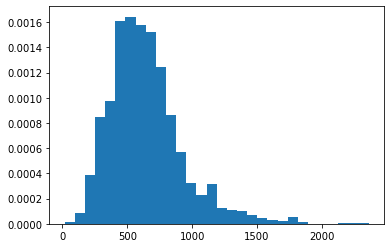

In [17]:
# plt.style.use('ggplot')
plt.hist(allreviewlength,density = True, bins=30)
plt.show()

In [18]:
print(max(allreviewlength))

2363


# vii. To represent each text (= data point), there are many ways. In NLP/Deep Learning terminology, this task is called tokenization. It is common to rep- resent text using popularity/ rank of words in text. The most common word in the text will be represented as 1, the second most common word will be represented as 2, etc. Tokenize each text document using this method.2

In [19]:
#creating a list of strings of each document
#referred https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html
directory = '../data/training_files/'
maintraindata = []
filenames = []
for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        filenames.append(f)
        with open(f,'r',encoding="utf-8") as file:
            data = file.read().replace('\n', ' ')
            maintraindata.append(data)

In [20]:
directory = '../data/testing_files/'
maintestdata = []
filenames = []
for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        filenames.append(f)
        with open(f,'r',encoding="utf-8") as file:
            data = file.read().replace('\n', ' ')
            maintestdata.append(data)

In [21]:
print(maintraindata)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
maintraindata[1]

'films adapted from comic books have had plenty of success  whether theyre about superheroes  batman  superman  spawn   or geared toward kids  casper  or the arthouse crowd  ghost world   but theres never really been a comic book like from hell before   for starters  it was created by alan moore  and eddie campbell   who brought the medium to a whole new level in the mid s with a part series called the watchmen   to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd   the book  or  graphic novel   if you will  is over  pages long and includes nearly  more that consist of nothing but footnotes   in other words  dont dismiss this film because of its source   if you can get past the whole comic book thing  you might find another stumbling block in from hells directors  albert and allen hughes   getting the hughes brothers to direct this seems almost as ludicrous as casting carrot top in  well  a

In [23]:
len(maintraindata)

1400

In [24]:
# print(filenames[1])

In [25]:
num_words = 1000
oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'

In [26]:
#applying tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(maintraindata)

In [27]:
# print(len(maintestdata))

In [28]:
train_sequences = tokenizer.texts_to_sequences(maintraindata)

In [29]:
test_sequences = tokenizer.texts_to_sequences(maintestdata)

In [30]:
train_sequences[0]

[94,
 80,
 945,
 3998,
 126,
 5,
 2,
 2422,
 876,
 3841,
 3,
 97,
 1416,
 36,
 72,
 53,
 24,
 1417,
 25,
 4,
 1,
 458,
 1241,
 16,
 13,
 686,
 1432,
 5,
 81,
 54,
 7,
 35,
 95,
 3,
 33,
 3842,
 530,
 1,
 628,
 254,
 1,
 28,
 3,
 10574,
 188,
 40,
 2094,
 2,
 14089,
 28,
 12,
 1,
 945,
 1293,
 8,
 2133,
 19,
 2,
 77,
 692,
 365,
 16,
 1688,
 9,
 7,
 2,
 77,
 104,
 4174,
 44,
 6,
 47,
 147,
 14,
 440,
 24,
 56,
 3843,
 25,
 5,
 1154,
 194,
 18,
 1327,
 9464,
 66,
 44,
 527,
 5,
 881,
 1,
 5957,
 877,
 11,
 164,
 411,
 3,
 119,
 341,
 3844,
 7857,
 16,
 52,
 20,
 60,
 3,
 104,
 751,
 4,
 263,
 37,
 3012,
 4,
 66,
 3,
 110,
 1603,
 50,
 243,
 17234,
 14,
 25,
 6787,
 36,
 239,
 5,
 32,
 568,
 14,
 261,
 3202,
 1347,
 16,
 3101,
 9,
 2263,
 39,
 47,
 20,
 1,
 497,
 11,
 1,
 28,
 83,
 22,
 327,
 321,
 6,
 8,
 22,
 309,
 89,
 7297,
 9,
 416,
 100,
 1270,
 16,
 97,
 17235,
 53,
 14,
 1214,
 143,
 7,
 44,
 34,
 10,
 24,
 159,
 1124,
 32,
 58,
 365,
 530,
 167,
 19,
 52,
 20,
 965,
 52,
 20,
 73

In [31]:
test_sequences

[[481,
  98,
  452,
  100,
  21,
  869,
  8,
  1148,
  45,
  5,
  1,
  640,
  4,
  1,
  735,
  1064,
  15,
  18,
  87,
  469,
  323,
  1471,
  5,
  9,
  10,
  70,
  10,
  18,
  32,
  11,
  49,
  4,
  1,
  738,
  66,
  224,
  26,
  274,
  51,
  9,
  30,
  1,
  1114,
  4529,
  2469,
  46,
  1,
  11784,
  7721,
  8,
  1,
  292,
  15,
  65,
  586,
  136,
  53,
  1,
  4029,
  751,
  4,
  1,
  5922,
  8571,
  144,
  224,
  695,
  5,
  5138,
  8,
  91,
  7776,
  101,
  17555,
  82,
  41,
  1,
  78,
  222,
  4,
  1,
  15,
  21,
  8,
  215,
  9,
  30,
  3523,
  8,
  412,
  1064,
  30,
  136,
  11,
  2,
  5178,
  37,
  7776,
  69,
  32,
  271,
  68,
  17555,
  9448,
  639,
  12,
  1,
  193,
  8,
  1,
  78,
  947,
  222,
  4,
  1,
  15,
  2391,
  477,
  2,
  2495,
  585,
  9,
  132,
  8,
  1747,
  613,
  1,
  6356,
  656,
  29,
  1,
  611,
  8,
  1,
  400,
  2739,
  20,
  437,
  5,
  23,
  700,
  100,
  43,
  1,
  28,
  416,
  9,
  885,
  2,
  8287,
  31,
  24,
  159,
  1124,
  5,
  2476,
  79,
 

In [32]:
allreviewlength.sort()
print(allreviewlength)

[16, 65, 103, 112, 119, 120, 141, 143, 149, 157, 159, 163, 164, 170, 171, 174, 182, 184, 188, 190, 193, 194, 195, 195, 197, 197, 199, 201, 202, 202, 202, 203, 207, 207, 207, 208, 210, 213, 214, 214, 216, 218, 219, 221, 223, 223, 224, 225, 226, 226, 230, 231, 232, 232, 234, 236, 236, 236, 237, 237, 240, 240, 240, 241, 241, 241, 242, 243, 244, 246, 247, 249, 250, 250, 250, 251, 251, 252, 252, 252, 254, 255, 255, 255, 256, 256, 256, 257, 259, 260, 260, 262, 262, 263, 264, 264, 265, 266, 269, 269, 269, 270, 270, 270, 270, 271, 271, 271, 271, 272, 273, 273, 273, 274, 274, 275, 276, 277, 278, 280, 280, 281, 282, 282, 282, 283, 283, 283, 284, 285, 285, 286, 286, 286, 286, 287, 287, 287, 287, 289, 289, 290, 291, 292, 292, 292, 293, 294, 295, 295, 295, 296, 296, 297, 297, 297, 298, 298, 298, 298, 298, 298, 298, 300, 301, 301, 301, 301, 301, 301, 302, 302, 302, 304, 304, 304, 304, 305, 307, 307, 308, 309, 312, 312, 313, 313, 315, 316, 317, 317, 317, 320, 320, 320, 320, 320, 322, 323, 323, 323, 3

# viii. Select a review length L that 70% of the reviews have a length below it. If you feel more adventurous, set the threshold to 90%.

In [33]:
k = int(0.7*(len(allreviewlength)))


In [34]:
print("The reviewlength that has 70% reviews with length below it are : ",allreviewlength[k+1])

The reviewlength that has 70% reviews with length below it are :  737


In [35]:
maxlen = allreviewlength[k+1]
maxlen

737

In [36]:
len(train_sequences)

1400

In [37]:
len(test_sequences)

600

In [38]:
print(type(test_sequences))

<class 'list'>


# ix. Truncate reviews longer than L words and zero-pad reviews shorter than L so that all texts (= data points) are of length L.3

In [39]:
train_padded = pad_sequences(train_sequences, padding=pad_type, maxlen=maxlen)

In [40]:
test_padded = pad_sequences(test_sequences, padding=pad_type, maxlen=maxlen)

In [41]:
print("Padded train sequesnces are: ")
print(train_padded)

Padded train sequesnces are: 
[[  94   80  945 ...    0    0    0]
 [  66 3435   31 ...    0    0    0]
 [ 149  141    3 ...    0    0    0]
 ...
 [  83 1692    2 ...    0    0    0]
 [  77  148  102 ...    0    0    0]
 [1096   18   50 ...    0    0    0]]


In [42]:
print("Padded test sequences are: ")
print(test_padded)

Padded test sequences are: 
[[   13   197  2036 ...     5  1064   579]
 [    1  1962     6 ...     0     0     0]
 [  966 35625     2 ...     2   980  1910]
 ...
 [   52    30     2 ...     0     0     0]
 [    5    23 16422 ...     9   158    23]
 [   80   876   458 ...     0     0     0]]


# (c) Word Embeddings

# i. One can use tokenized text as inputs to a deep neural network. However, a re- cent breakthrough in NLP suggests that more sophisticated representations of text yield better results. These sophisticated representations are called word embeddings. “Word embedding is a term used for representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning.”4. Most deep learning modules (including Keras) provide a convenient way to convert positive integer rep- resentations of words into a word embedding by an “Embedding layer.” The layer accepts arguments that define the mapping of words into embeddings including the maximum number of expected words also called the vocabulary size (e.g. the largest integer value). The layer also allows you to specify the dimension for each word vector, called the “output dimension.” We would like to use a word embedding layer for this project. Assume that we are inter- ested in the top 5,000 words. This means that in each integer sequence that represents each document, we set to zero those integers that represent words that are not among the top 5,000 words in the document.5 If you feel more adventurous, use all the words that appear in this corpus. Choose the length of the embedding vector for each word to be 32. Hence, each document is represented as a 32 × L matrix

In [43]:
modified_train_padded = train_padded

In [44]:
modified_test_padded = test_padded

In [45]:
for i in range(len(modified_train_padded)):
    for j in range(len(modified_train_padded[i])):
        if modified_train_padded[i][j]>5000:
              modified_train_padded[i][j] = 0

In [46]:
for i in range(len(modified_test_padded)):
    for j in range(len(modified_test_padded[i])):
        if modified_test_padded[i][j]>5000:
            modified_test_padded[i][j] = 0

### Making changes for the embeded layer

In [47]:
modified_train_padded

array([[  94,   80,  945, ...,    0,    0,    0],
       [  66, 3435,   31, ...,    0,    0,    0],
       [ 149,  141,    3, ...,    0,    0,    0],
       ...,
       [  83, 1692,    2, ...,    0,    0,    0],
       [  77,  148,  102, ...,    0,    0,    0],
       [1096,   18,   50, ...,    0,    0,    0]])

In [48]:
modified_test_padded

array([[  13,  197, 2036, ...,    5, 1064,  579],
       [   1, 1962,    6, ...,    0,    0,    0],
       [ 966,    0,    2, ...,    2,  980, 1910],
       ...,
       [  52,   30,    2, ...,    0,    0,    0],
       [   5,   23,    0, ...,    9,  158,   23],
       [  80,  876,  458, ...,    0,    0,    0]])

# ii. Flatten the matrix of each document to a vector

# Ans: Flattening is done during the model definition in the below models

# d) Multi-Layer Perceptron

# i. Train a MLP with three (dense) hidden layers each of which has 50 ReLUs and one output layer with a single sigmoid neuron. Use a dropout rate of 20% for the first layer and 50% for the other layers. Use ADAM optimizer and binary cross entropy loss (which is equivalent to having a softmax in the output). To avoid overfitting, just set the number of epochs as 2. Use a batch size of 10.

# ii. Report the train and test accuracies of this model.

### Creating labels for training_files and testing_files

In [49]:
directory = '../data/pos_copy/'
posfiles = []
for file in os.listdir(directory):
    posfiles.append(file)

directory = '../data/training_files/'
temp = []
for file in os.listdir(directory):
    temp.append(file)

train_sentiment = []
for i in temp:
    if i in posfiles:
        train_sentiment.append(1)
    else:
        train_sentiment.append(0)
  

In [50]:
print(len(train_sentiment))

1400


In [51]:
directory = '../data/pos_copy/'
posfiles = []
for file in os.listdir(directory):
    posfiles.append(file)

directory = '../data/testing_files/'
temp = []
for file in os.listdir(directory):
    temp.append(file)

test_sentiment = []
for i in temp:
    if i in posfiles:
        test_sentiment.append(1)
    else:
        test_sentiment.append(0)

In [52]:
print(len(test_sentiment))

600


In [53]:
model = Sequential()
model.add(Embedding(5001, 32, input_length = maxlen))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 737, 32)           160032    
                                                                 
 flatten (Flatten)           (None, 23584)             0         
                                                                 
 dense (Dense)               (None, 50)                1179250   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2

In [54]:
import numpy as np
model.fit(modified_train_padded, np.array(train_sentiment), epochs=8, verbose=1)


Epoch 1/8
44/44 [==============================] - 1s 13ms/step - loss: 0.6948 - accuracy: 0.5136
Epoch 2/8
44/44 [==============================] - 1s 14ms/step - loss: 0.6829 - accuracy: 0.5614
Epoch 3/8
44/44 [==============================] - 1s 15ms/step - loss: 0.5859 - accuracy: 0.7014
Epoch 4/8
44/44 [==============================] - 1s 13ms/step - loss: 0.2658 - accuracy: 0.9107
Epoch 5/8
44/44 [==============================] - 1s 14ms/step - loss: 0.0552 - accuracy: 0.9900
Epoch 6/8
44/44 [==============================] - 1s 13ms/step - loss: 0.0207 - accuracy: 0.9936
Epoch 7/8
44/44 [==============================] - 1s 14ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 8/8
44/44 [==============================] - 1s 15ms/step - loss: 0.0081 - accuracy: 0.9979


In [55]:
loss, accuracy = model.evaluate(modified_test_padded, np.array(test_sentiment), verbose=1)
print('Accuracy: %f' % (accuracy*100))


19/19 [==============================] - 0s 3ms/step - loss: 1.6548 - accuracy: 0.5983
Accuracy: 59.833336


# e) One-Dimensional Convolutional Neural Network:

# Although CNNs are mainly used for image data, they can also be applied to text data, as text also has adjacency information. Keras supports one-dimensional convolutions and pooling by the Conv1D and MaxPooling1D classes respectively

# i. After the embedding layer, insert a Conv1D layer. This convolutional layer has 32 feature maps , and each of the 32 kernels has size 3, i.e. reads embedded word representations 3 vector elements of the word embedding at a time. The convolutional layer is followed by a 1D max pooling layer with a length and stride of 2 that halves the size of the feature maps from the convolutional layer. The rest of the network is the same as the neural network above.

# ii. Report the train and test accuracies of this model.

In [56]:
#referred https://www.datatechnotes.com/2020/02/classification-example-with-keras-cnn.html
from tensorflow.keras.layers import MaxPooling1D
modelcnn = Sequential()
modelcnn.add(Embedding(5001, 32, input_length = maxlen))
modelcnn.add(Conv1D(filters=32,kernel_size=3,activation="relu"))
modelcnn.add(MaxPooling1D(pool_size=2))
modelcnn.add(Flatten())

In [57]:
modelcnn.add(Dense(50, activation='relu'))
modelcnn.add(Dropout(0.2))
modelcnn.add(Dense(50, activation='relu'))
modelcnn.add(Dropout(0.5))
modelcnn.add(Dense(50, activation='relu'))
modelcnn.add(Dropout(0.5))
modelcnn.add(Dense(1, activation='sigmoid'))
modelcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(modelcnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 737, 32)           160032    
                                                                 
 conv1d (Conv1D)             (None, 735, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 367, 32)          0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 11744)             0         
                                                                 
 dense_4 (Dense)             (None, 50)                587250    
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                      

In [58]:
modelcnn.fit(modified_train_padded, np.array(train_sentiment), epochs=8, verbose=1)

Epoch 1/8
44/44 [==============================] - 2s 22ms/step - loss: 0.6961 - accuracy: 0.5221
Epoch 2/8
44/44 [==============================] - 1s 21ms/step - loss: 0.6934 - accuracy: 0.5029
Epoch 3/8
44/44 [==============================] - 1s 22ms/step - loss: 0.6842 - accuracy: 0.5743
Epoch 4/8
44/44 [==============================] - 1s 22ms/step - loss: 0.6594 - accuracy: 0.6136
Epoch 5/8
44/44 [==============================] - 1s 24ms/step - loss: 0.4375 - accuracy: 0.8364
Epoch 6/8
44/44 [==============================] - 1s 24ms/step - loss: 0.1025 - accuracy: 0.9743
Epoch 7/8
44/44 [==============================] - 1s 24ms/step - loss: 0.0287 - accuracy: 0.9957
Epoch 8/8
44/44 [==============================] - 1s 24ms/step - loss: 0.0181 - accuracy: 0.9971


In [59]:
loss, accuracy = modelcnn.evaluate(modified_test_padded, np.array(test_sentiment), verbose=1)
print('Accuracy: %f' % (accuracy*100))

19/19 [==============================] - 0s 9ms/step - loss: 0.9273 - accuracy: 0.7700
Accuracy: 76.999998


# (f) Long Short-Term Memory Recurrent Neural Network:

# The structure of the LSTM we are going to use is shown in the following figure.

# i. Each word is represented to LSTM as a vector of 32 elements and the LSTM is followed by a dense layer of 256 ReLUs. Use a dropout rate of 0.2 for both LSTM and the dense layer. Train the model using 10-50 epochs and batch size of 10.

# ii. Report the train and test accuracies of this model.

In [60]:
#referred https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
from keras.layers import LSTM
from tensorflow import keras
import tensorflow as tf
modellstm = Sequential()
modellstm.add(Embedding(5001, 32, input_length = maxlen))
modellstm.add(LSTM(32))
modellstm.add(Dropout(0.2))
modellstm.add(Dense(256, activation='relu'))
modellstm.add(Dropout(0.2))
modellstm.add(Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(0.0001)
modellstm.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])

print(modellstm.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 737, 32)           160032    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 256)               8448      
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 177,057
Trainable params: 177,057
Non-tr

In [61]:
modellstm.fit(modified_train_padded, np.array(train_sentiment), epochs=40, verbose=1)

Epoch 1/40
44/44 [==============================] - 9s 171ms/step - loss: 0.6931 - accuracy: 0.5193
Epoch 2/40
44/44 [==============================] - 7s 168ms/step - loss: 0.6928 - accuracy: 0.5436
Epoch 3/40
44/44 [==============================] - 8s 175ms/step - loss: 0.6923 - accuracy: 0.5479
Epoch 4/40
44/44 [==============================] - 8s 176ms/step - loss: 0.6919 - accuracy: 0.5557
Epoch 5/40
44/44 [==============================] - 7s 168ms/step - loss: 0.6910 - accuracy: 0.5557
Epoch 6/40
44/44 [==============================] - 7s 170ms/step - loss: 0.6900 - accuracy: 0.5564
Epoch 7/40
44/44 [==============================] - 8s 178ms/step - loss: 0.6891 - accuracy: 0.5579
Epoch 8/40
44/44 [==============================] - 7s 166ms/step - loss: 0.6876 - accuracy: 0.5607
Epoch 9/40
44/44 [==============================] - 7s 166ms/step - loss: 0.6851 - accuracy: 0.5564
Epoch 10/40
44/44 [==============================] - 8s 172ms/step - loss: 0.6825 - accuracy: 0.5550

In [62]:
loss, accuracy = modellstm.evaluate(modified_test_padded, np.array(test_sentiment), verbose=1)
print('Accuracy: %f' % (accuracy*100))

19/19 [==============================] - 1s 42ms/step - loss: 0.6261 - accuracy: 0.7867
Accuracy: 78.666669
